# Step-1 : Business Problem
**Create a predict model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researhers classify penguin in the field, instead of needing an experienced biologist**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# **Data Preprocessing**
**EDA**

In [6]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [10]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


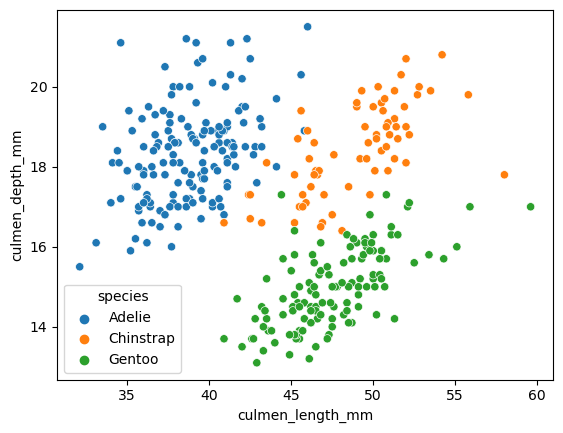

In [11]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species')
plt.show()

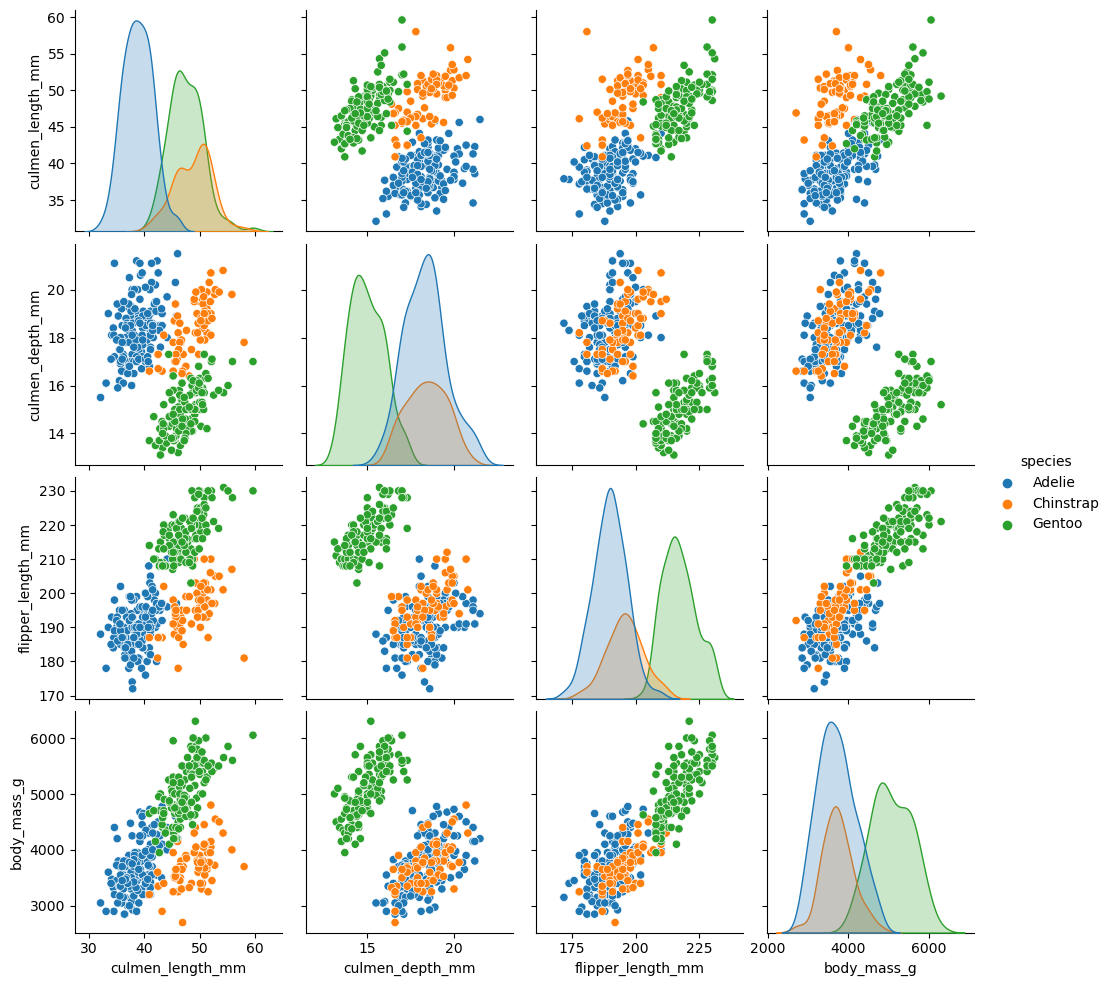

In [12]:
sns.pairplot(df, hue='species')
plt.show()

**Data Cleaning**

In [13]:
df['sex'].replace(',', 'MALE', inplace=True)

In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

**Encoding**

In [16]:
X = pd.get_dummies(df.drop('species', axis=1),drop_first=True)
y = df['species']

**Train/Test Split**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Modelling & Evalution
**Decision Tree Clasiifier - with default Hyperparameter**

In [24]:
# Modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=0)
dt_default.fit(X_train, y_train)

# Pradiction
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)

# Evalution
from sklearn.metrics import accuracy_score
print('Train accuracy:', accuracy_score(pred_train, y_train))
print('Test accuracy:', accuracy_score(base_pred, y_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:', cross_val_score(dt_default, X,y,cv=5).mean())

Train accuracy: 1.0
Test accuracy: 1.0
Cross Validation Score: 0.9679028132992329


**Visualize the Tree**

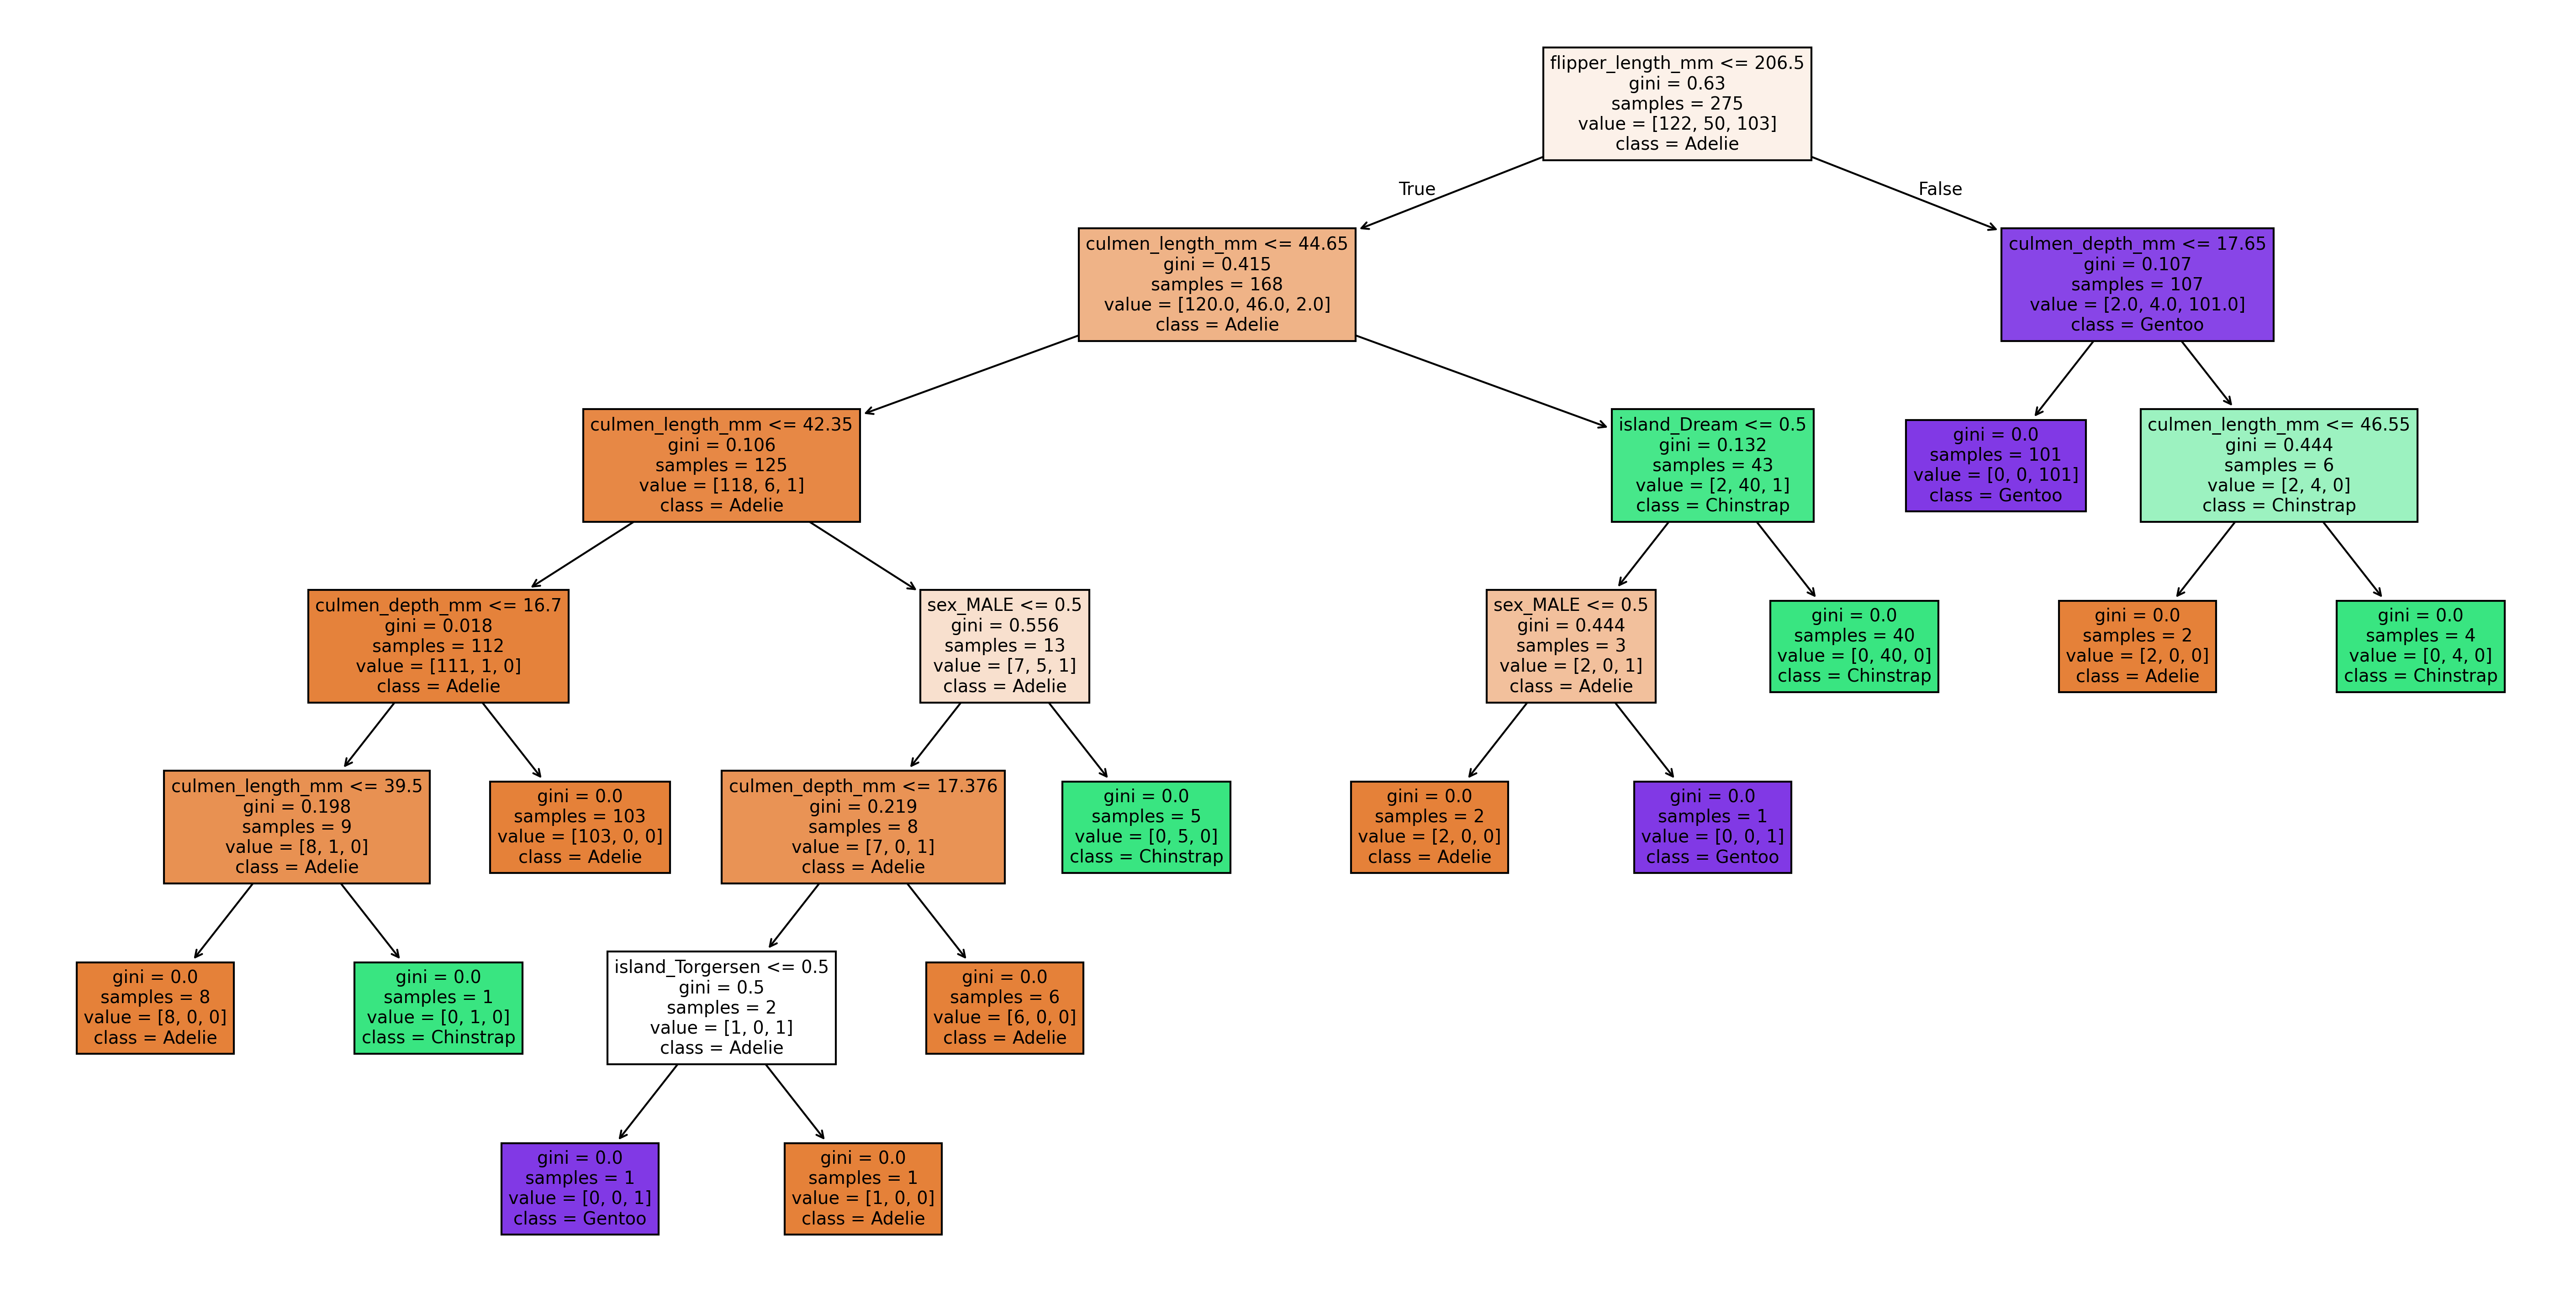

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)

plot_tree(dt_default,
         filled=True,
         feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
         class_names=['Adelie','Chinstrap','Gentoo'])

plt.show()

**HyperParameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV

# Model
estimator = DecisionTreeClassifier(random_state=0)

# Prameters (which ypu want to tune and identify the best)
param_grid = {'criterion':['gini', 'entrophy'],
             'max_depth':[1,2,3,4,5]}

grid = GridSearchCV(estimator, param_grid, scoring='accuracy',cv=5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

**importance od each feature given by this model**

In [ ]:
grid.best_estimator_.feature_importances_

In [30]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index=X.columns,
                    columns=['Feature Importance'])

feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()

# Final Decision Tree Model
**with best hyper parameter & with important features**

In [32]:
# input with important features
X_imp = X[important_features_list]

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y,test_size=0.2, random_state=6)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evalution
print('Train accuracy',accuracy_score(ypred_train, y_train))
print('Test accuracy',accuracy_score(ypred_test, y_test))
print('Cross Validation Score:',cross_val_score(final_dt_model,X_imp, y,cv=5).mean())

Train accuracy 0.9963636363636363
Test accuracy 1.0
Cross Validation Score: 0.9766837169650469


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)

In [35]:
confusion_matrix(y_train, ypred_train)

array([[122,   0,   0],
       [  0,  50,   0],
       [  1,   0, 102]], dtype=int64)